Which metric we focus on optimizing often depends on the business case. If the offers we make to keep potential churners is high in relation to the value of losing customers we want our model to have high precision or minimize false positives. 

Conversely, if losing customers we didn't think would churn is more expensive than an offer to keep a customer that would not have churned than we want a high recall or minimize false negatives. 

Both recall and precision are far more valuable than just looking at accuracy.

# Importing Libraries

In [231]:
#basic
import numpy as np
import pandas as pd
import geopandas as gpd

#visaualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sql
import mysql.connector


#warnings
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)


# Importing Data

In [232]:
#connection=mysql.connector.connect(
    #host='18.136.157.135',
    #user='dm_team3',
    #password='DM!$!Team!27@9!20&',
    #database='project_telecom')

In [233]:
#tables=pd.read_sql_query('show tables', connection)
#tables

In [234]:
#df=pd.read_sql_query('SELECT * from telecom_churn_data', connection)

In [235]:
df=pd.read_csv('customer_churn')

In [236]:
df.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [237]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [238]:
df.columns=['state', 'account_length', 'area_code', 'phone', 'international_plan', 'vmail_plan', 'vmail_message', 'day_mins',
            'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 
            'international_mins', 'international_calls', 'international_charge', 'custServ_calls', 'churn']

In [239]:
df.head(1)

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.


In [240]:
df.shape

(4617, 21)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   object 
 1   account_length        4617 non-null   int64  
 2   area_code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   object 
 5   vmail_plan            4617 non-null   object 
 6   vmail_message         4617 non-null   int64  
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int64  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int64  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int64  
 15  night_charge         

- There are 4617 entries and 21 features
- Every column has 4617 non-null values indicating that there are no missing values in the data
- Memory consumed by the data is around 758 Kb

In [242]:
df.duplicated().any()

False

In [243]:
df.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- The account_length column has a minimum value of 1 and a maximum value of 243.
- The vmail_message column has a minimum value of 0 and a maximum value of 51. On an average, customers sent around 8 voice mail messages.
- Customers made around 100 calls on an average during day, evening and night which made dataset balanced in that respect.
- On an average, customers talked on 180.44 mins during the day, 200.42 mins during evening, and 200.62 mins during night. This means customers tend to spend more time talking during evening and night than day. 
- The average calling charges for evening ($17) and night($9) is much lower that day($30). Average international calling charge is around $3 which is signifantly lesser.
- Customers spend around 10 mins on international calls. Average international calling charge is around $3 which is significantly lesser.
- There are some customers who make very long calls during the day and even thought they have to pay high charges.
- The international_mins column has a maximum value of 20, which suggests that there might be some outliers or high-value customers in this category.
- The custServ_calls column has a maximum value of 9, which indicates that some customers had to contact customer service multiple times, and it might be interesting to explore why they had to do so.

In [244]:
df.describe(include='O')

,state,phone,international_plan,vmail_plan,churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


- There are 51 unique states represented in the dataset.
- Each phone number in the dataset is unique, which indicates that it can be used as a unique identifier for each customer.
- Most of the customers (4171 out of 4617) do not have an international plan.
- A significant number of customers (3381 out of 4617) do not have a voicemail plan.
- There are 3961 customers who did not churn, and only 656 customers churned. This suggests that the dataset may be imbalanced, and some additional analysis may be required to handle this.

In [245]:
def modify_churn(x):

    if x==' True.':
        return 1
    else:
        return 0
    
    

In [246]:
df['churn']=df['churn'].apply(modify_churn)

# Exploratory Data Analysis

## Univariate

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter'

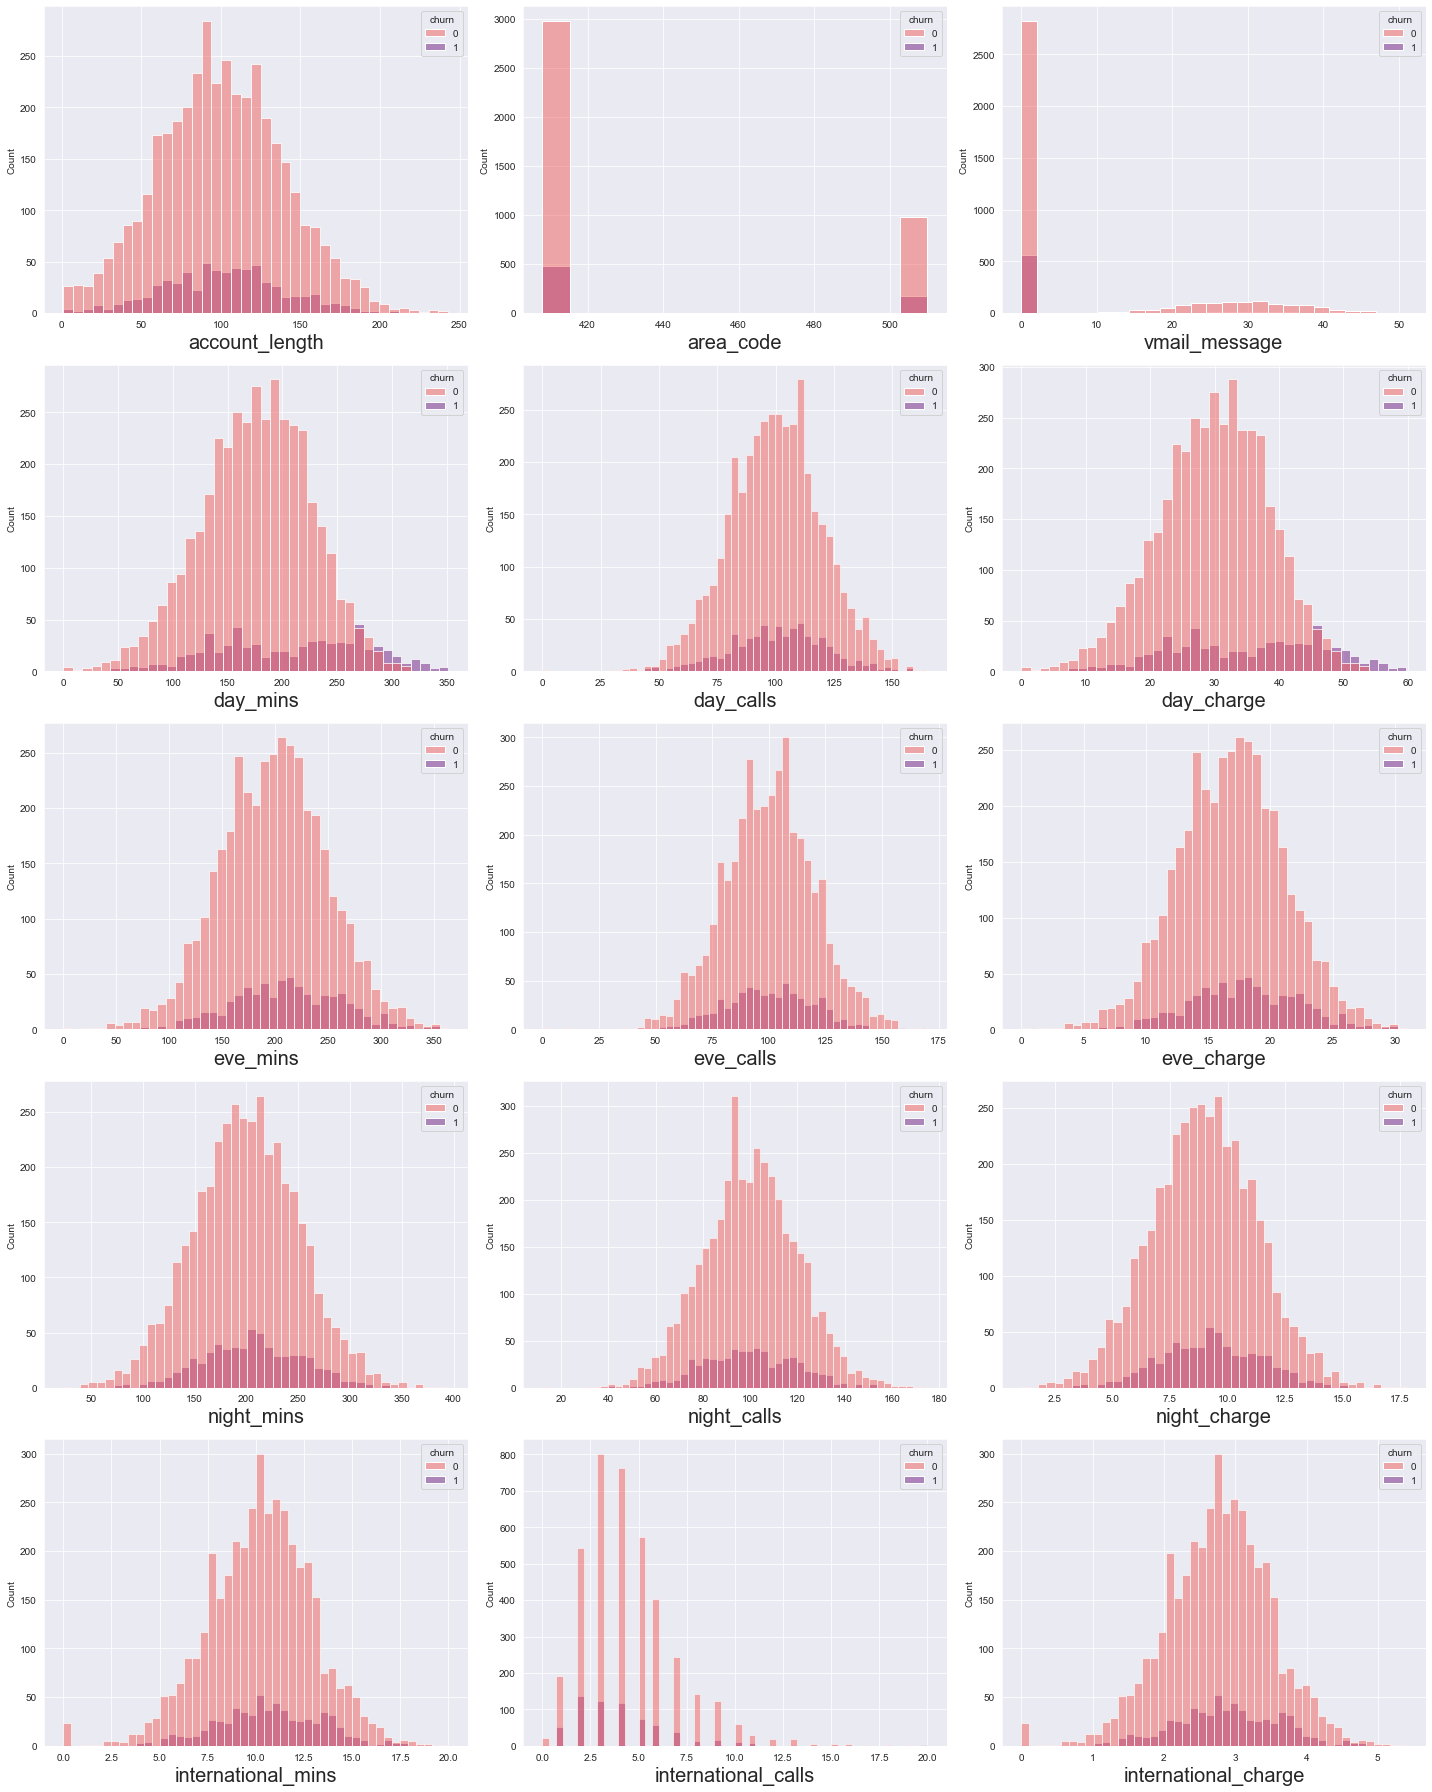

In [247]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(['int', 'float']).columns:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(x=df[column],hue=df.churn, palette='magma_r')
        plt.xlabel(column,fontsize=20)  
    plotnumber= plotnumber + 1
plt.tight_layout()

- Almost all the numerical columns are normally distributed.
- Since most of the customer have opted out for voice mail plan, we can notice that there are significantly large number of customers who did not send voice mail messages.
- International calls and customer service calls appeared slightly right skewed.

### Churned & Not churned 

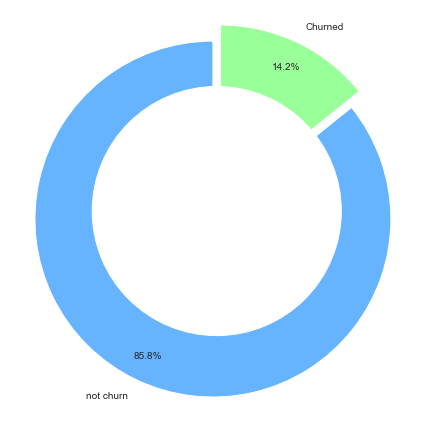

In [248]:
# number of customers who churned and who did not churn
churn_count = df['churn'].value_counts()

# pie chart to visualize the distribution of customer churn
labels = ['not churn', 'Churned']
sizes = churn_count.values.tolist()

#colors
colors = ['#66b3ff', '#99ff99'] 

 
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05))
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout();

### Account Length & International Plan

<AxesSubplot:xlabel='churn', ylabel='account_length'>

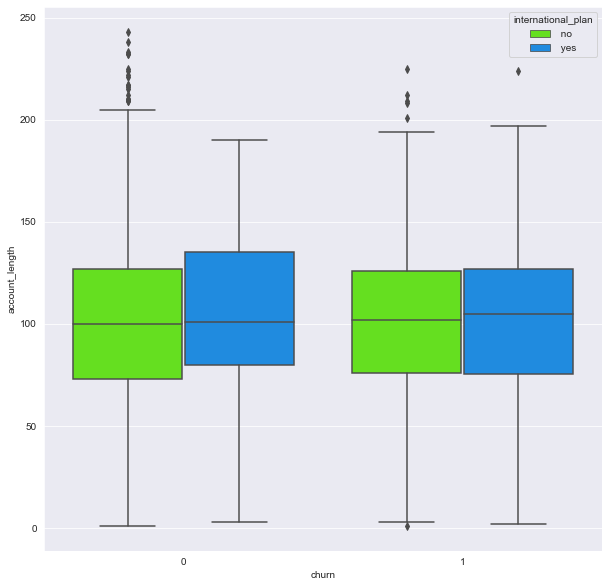

In [249]:
plt.figure(figsize=(10,10))
sns.boxplot(x='churn', y='account_length', hue='international_plan', data=df, palette='gist_rainbow')

- The plot help us to visualize whether the "International Plan" feature has an impact on account length or churn. 
- All the 4 boxplot appeared to almost aligned and having same size. 
- There is also a minimal difference between median values of all the boxplots.
- From the plot suggests that it does not matter whether or not a customer had an international plan, as far as predicting customer churn

### CustService calls and voice-mail plan

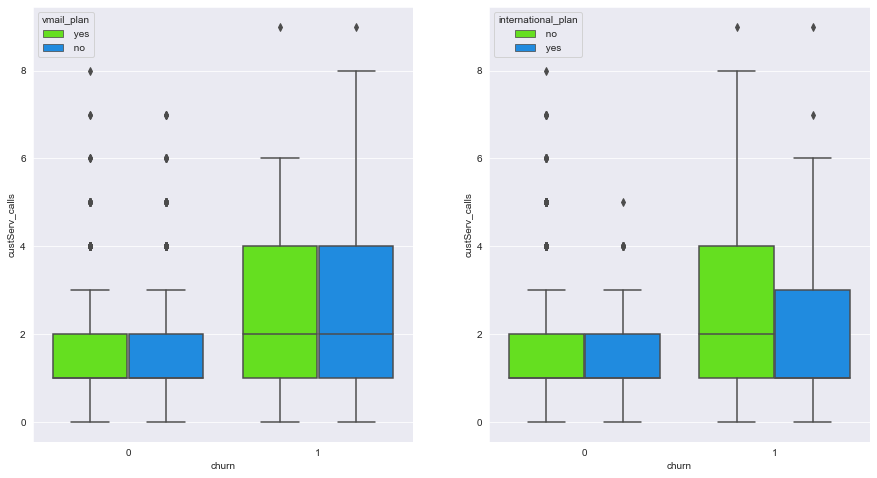

In [250]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'churn', y = 'custServ_calls', hue='vmail_plan', data = df, palette='gist_rainbow');

plt.subplot(1,2,2)
sns.boxplot(x = 'churn', y = 'custServ_calls', hue='international_plan', data = df, palette='gist_rainbow');

- It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. 

### Count plots

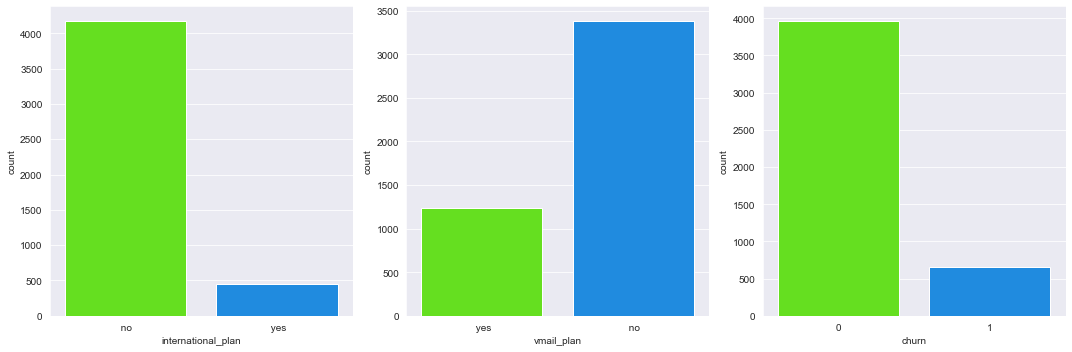

In [251]:
cat_columns = ['international_plan', 'vmail_plan', 'churn']

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for cat, ax in zip(cat_columns, axs.flatten()):
    sns.countplot(x=cat, data=df, ax=ax, palette='gist_rainbow')
plt.tight_layout()


In [252]:
df.churn.value_counts(normalize=False)

0    3961
1     656
Name: churn, dtype: int64

- The dataset is evidently imbalanced.
- The imbalance is not just limited to target variable but also to independent variables
- The frequency distribution shows a class imbalance, with the "no" category being much more prevalent than the "yes" category.
- The presence or absence of an international plan may be an important feature in predicting customer churn, as it could indicate a higher or lower level of engagement with the telecom provider's services.
- The count of "no" values in the vmail_plan is 2673, which is significantly higher than the count of "yes" values, which is 1020.
- This suggests that a large majority of customers (almost 74%) do not have a voicemail plan.
- There are 3162 instances of "False." in the column "churn", which indicates that a large majority (about 85%) of the customers in the dataset did not churn.
- On the other hand, there are 631 instances of "True." in the column "churn", which indicates that a relatively small minority (about 14%) of the customers in the dataset churned.

# Bivariate

In [253]:
df.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


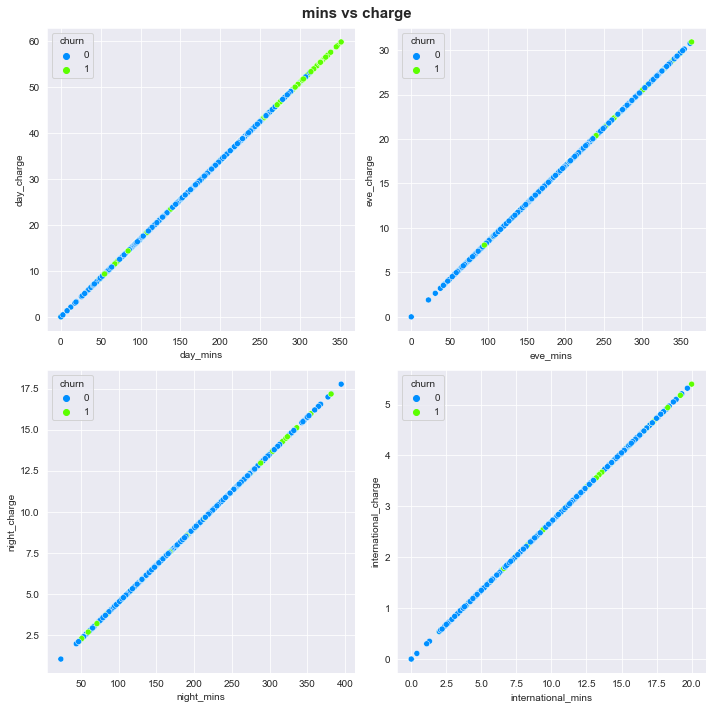

In [254]:
types = ['day', 'eve', 'night', 'international']

fig, ax = plt.subplots(2,2, figsize=(10,10))

for type, ax in zip(types, ax.flatten()):
    sns.scatterplot(x=type+"_mins", y=type+"_charge", data=df, ax=ax, hue="churn", palette='gist_rainbow_r');

plt.suptitle('mins vs charge', fontsize=15, fontweight='bold')
plt.tight_layout()



- We can clearly see that more the talking mimutes more are the charges. Two features are strongly correlated for each type(day, eve, night, international)
- This finding will help us reduce the dimentionality of the dataset
- In the first plot, we can also observe that the orange dots are concentrated on the top right side, indicating that customer who left used to talk more during day time and hence paid more charges

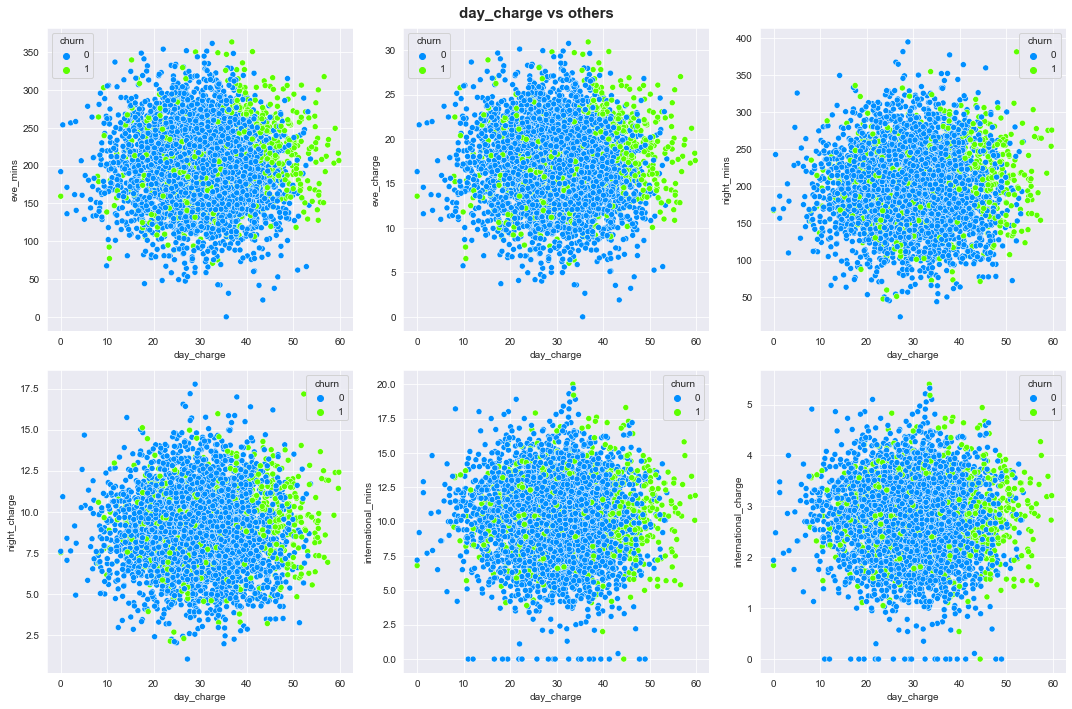

In [255]:
relations=['eve_mins', 'eve_charge', 'night_mins', 'night_charge', 'international_mins', 'international_charge']

fig, ax = plt.subplots(2,3, figsize=(15,10))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='day_charge', y=relation, data=df, ax=ax, palette='gist_rainbow_r', hue="churn");

plt.suptitle('day_charge vs others', fontsize=15, fontweight='bold')
plt.tight_layout()


- From the above plots, color differentiation help us notice that orange dots are concentrated on the right side of the plots. This implies, customer switched to competitors had spend more time talking on call during day time and, as a result, paid higher day charge.
- These scatterplot suggest that day charges might be the strong reason for customer churn

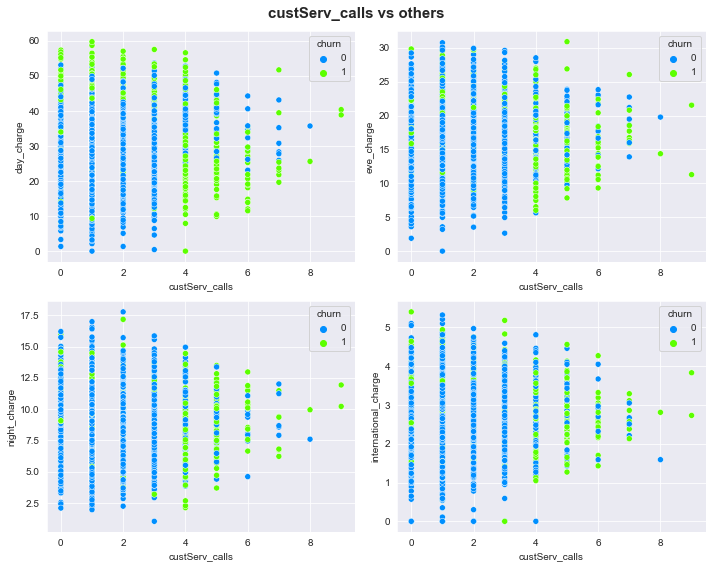

In [256]:
relations=['day_charge', 'eve_charge', 'night_charge', 'international_charge']

fig, ax = plt.subplots(2,2, figsize=(10,8))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='custServ_calls', y=relation, data=df, ax=ax, hue="churn", palette='gist_rainbow_r');

plt.suptitle('custServ_calls vs others', fontsize=15, fontweight='bold')
plt.tight_layout()

- Green dots are crowded on the side where customers had called customer service more number of times.
- Approximately, customers who made 4 or more calls were likey to churn more
- From the first graph, we can see that day charge also contribute in churning of customers as green dots are gathered on the top side as well

 ### Comparison of churn rate between customers with and without international plan:

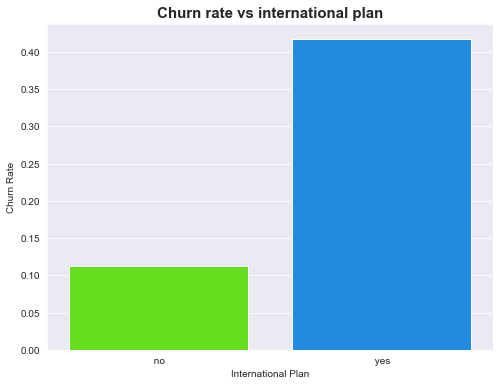

In [257]:
# Group the data by international_plan and churn and count the number of occurrences
churn_by_intlplan = df.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the churn rate for each group
churn_by_intlplan['churn_rate'] = churn_by_intlplan[1] / (churn_by_intlplan[0] + churn_by_intlplan[1])

# Plot the churn rate for each group
plt.figure(figsize=(8,6))
sns.barplot(x='international_plan', y='churn_rate', data=churn_by_intlplan.reset_index(), palette='gist_rainbow')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.title('Churn rate vs international plan', fontsize=15, fontweight='bold');

- In the group without an international plan, there were 2969 customers who did not churn and 379 customers who churned. This gives a churn rate of 
11.3%.
- In the group with an international plan, there were 193 customers who did not churn and 152 customers who churned. This gives a higher churn rate of 44.1%.
- Therefore, it appears that customers with an international plan are more likely to churn than customers without an international plan.

### Top States where customer churned the most

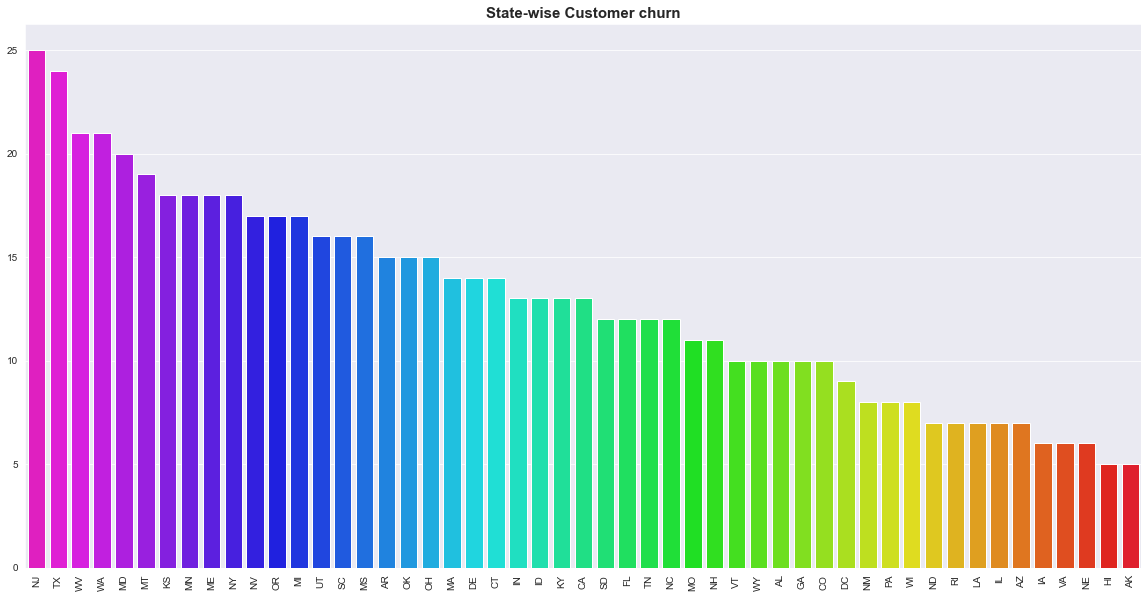

In [258]:
churned= df[df['churn']==1].groupby('state')['area_code'].count().sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(list(churned.keys()), list(churned.values), palette='gist_rainbow_r')  #gnuplot2
plt.xticks(rotation=90)
plt.title('State-wise Customer churn', fontsize=15, fontweight='bold');

- The number of customers who churned varies across different states, with the highest number being 19 and the lowest being 4.
- The top 5 states with the highest number of customers churned are NJ, TX, and MD with 19 customers churned each, followed by MN, WV, and WA with 18 customers churned each.
- The bottom 5 states with the lowest number of customers churned are WI, IA, LA, RI, ND, and NE, all with only 5 customers churned each.

Let's also compare the number of customer churned in each state to the total number of customers in that state. This would give us a churn rate for each state, which could be a better metric for identifying problem areas. For example, if a state has a high churn rate despite having a low number of customer churned, it could indicate that the company has a larger customer base in that state, and therefore, the problem is more significant than it appears.

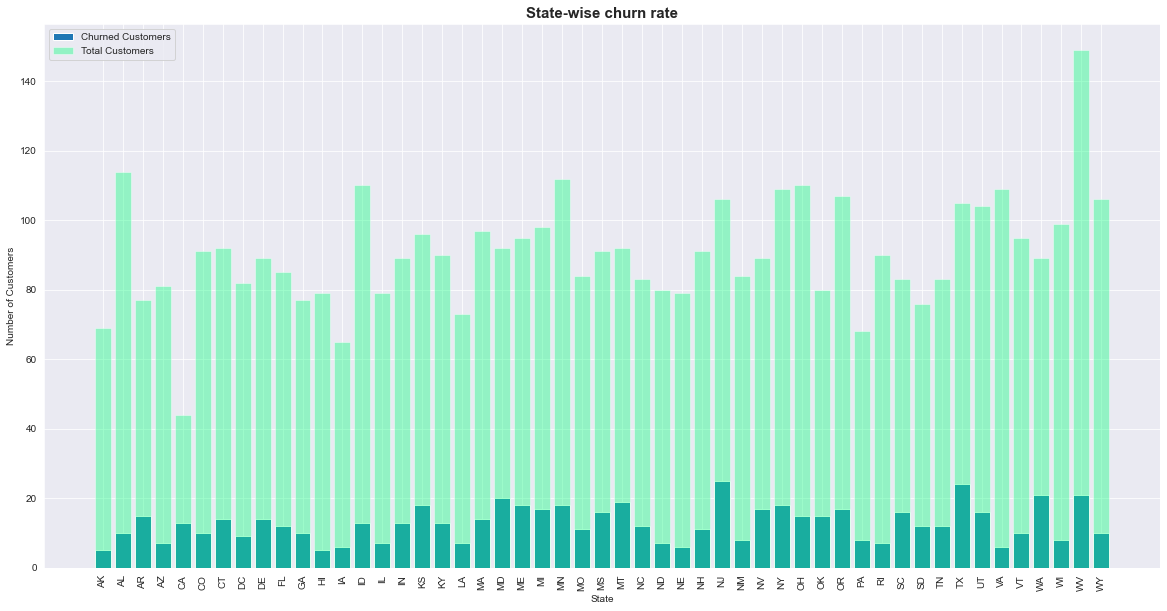

In [259]:
# the churn rate for each state
churn_rate = df.groupby('state')['churn'].mean()

# total number of customers for each state
total_customers = df['state'].value_counts()

# churned customers for each state
churned_customers = churn_rate * total_customers

# bar plot for churned customers and total customers by state
plt.subplots(figsize=(20, 10))
plt.bar(churned_customers.index, churned_customers.values, label='Churned Customers')
plt.bar(total_customers.index, total_customers.values, alpha=0.4, label='Total Customers', color='#10ff81')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=90)
plt.title('State-wise churn rate', fontsize=15, fontweight='bold');

- The state with the highest churn rate is MD (Maryland) with 19 out of 72 customers churning, which is around 26.4% churn rate.
- MN (Minnesota) has the second-highest churn rate with 18 out of 95 customers churning, which is around 18.9% churn rate.
- WV (West Virginia) has the third-highest churn rate with 18 out of 117 customers churning, which is around 15.4% churn rate.
- The states with the lowest churn rates are HI (Hawaii), AZ (Arizona), and GA (Georgia) with only 4 out of 63, 4 out of 62, and 9 out of 59 customers churning, respectively. This gives a churn rate of around 6.3%, 6.5%, and 15.3%, respectively.
- There seems to be no clear relationship between the number of customers in a state and the churn rate. 

## Multivariate

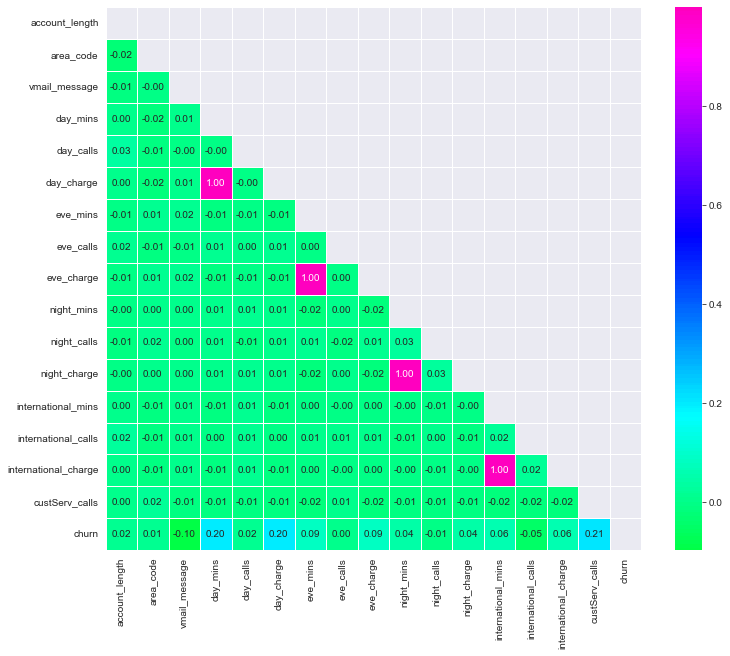

In [260]:
corr= df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='gist_rainbow', linewidths=1, annot=True, fmt='.2f');


- Positive correlations: The features "day_mins," "day_charge," "eve_mins," "eve_charge," "night_mins," "night_charge," "international_mins," "international_charge," and "custServ_calls" show positive correlations with the churn column. This suggests that as these features increase, the likelihood of churn also increases. Specifically, factors such as longer call duration (day, evening, night, and international), higher charges, and more customer service calls are associated with a higher probability of churn.

- Negative correlation: The feature "vmail_message" shows a negative correlation with the churn column. This implies that customers who have a higher number of voicemail messages are less likely to churn. It suggests that the availability and use of voicemail services may contribute to customer retention.

- Weak correlations: The features "account_length," "area_code," "day_calls," "eve_calls," "night_calls," and "international_calls" show weak correlations with the churn column. These correlations are close to zero, indicating that these factors have minimal influence on churn.

- Overall influence: The highest correlation is observed between the churn column and the "custServ_calls" feature, with a correlation coefficient of 0.209. This indicates that the number of customer service calls has a relatively stronger relationship with churn compared to other features.

Based on these observations, it appears that factors related to call duration, charges, and customer service calls have a significant impact on churn. Understanding and managing these factors effectively may help in reducing churn rates and improving customer retention strategies. Additionally, the negative correlation with "vmail_message" suggests that voicemail services could be a potential factor in retaining customers.- 

## t-SNE Visualisations

In [261]:
from sklearn. manifold import TSNE

numeric_data= df.select_dtypes(['int', 'float'])

tsne=TSNE(learning_rate=50)
tsne_features= tsne.fit_transform(numeric_data)

In [262]:
numeric_data['x']= tsne_features[:,0]
numeric_data['y']= tsne_features[:,1]
numeric_data['churn']=df['churn']
numeric_data['international_plan']=df['international_plan']
numeric_data['vmail_plan']=df['vmail_plan']

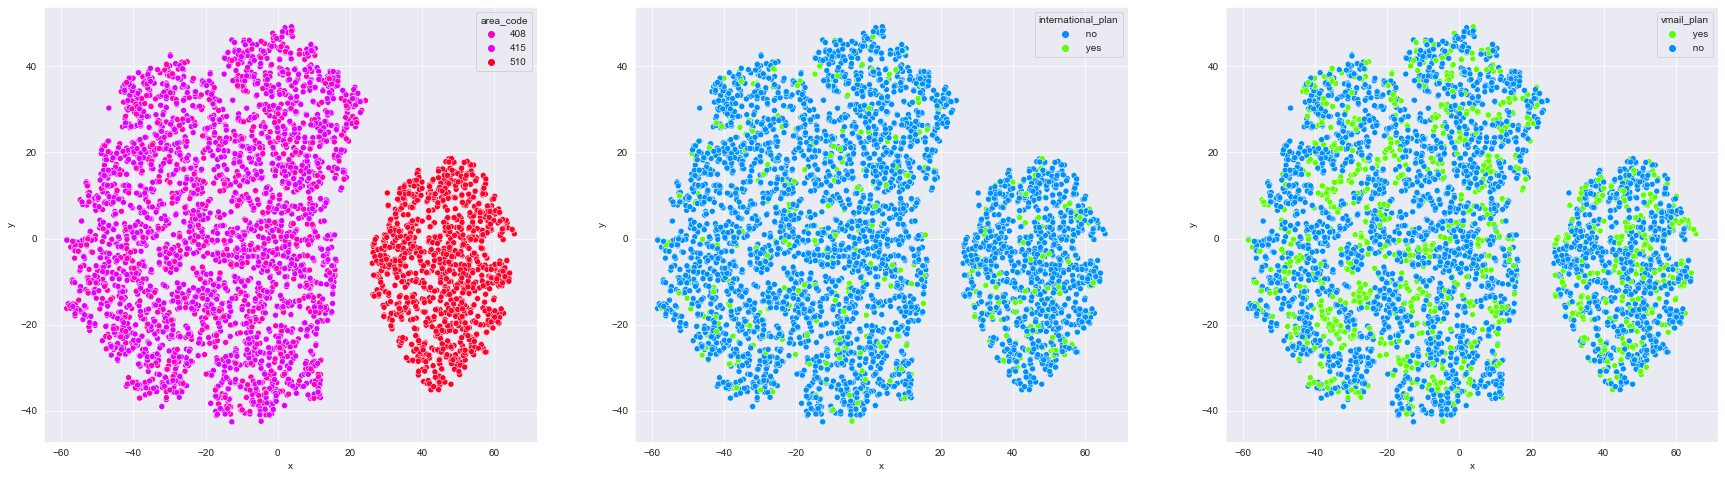

In [263]:
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.scatterplot(x='x', y='y', hue='area_code', data=numeric_data, palette='gist_rainbow_r')

plt.subplot(1,3,2)
sns.scatterplot(x='x', y='y', hue='international_plan', data=numeric_data, palette='gist_rainbow_r')

plt.subplot(1,3,3)
sns.scatterplot(x='x', y='y', hue='vmail_plan', data=numeric_data, palette='gist_rainbow');

- From the given features in the dataset, TSNE picked up that area code explains a lot of variance in the dataset and used that to spread out points along the x-axis, with customers from aread code 510 on the right and remaining customers on the right.
- international_plan and vmail_plan do not show any specific pattern. 

# Data Processing

## Dropping Irrelevant columns

In [264]:
df.drop(columns=['state', 'area_code', 'phone'], inplace=True)

## Multi-collinearity

- From the scatter plots and correlation heatmap, we observed that mins column is strongly correlated with charge columns for day, evening, night and international calling
- We will drop all mins columns and keep charge columns as charge column would be representative of calling minutes and charge per miniute.

In [265]:
df.drop(columns=['day_mins', 'eve_mins', 'night_mins', 'international_mins'], inplace=True)

## Outliers

In [266]:
from MGD_Outliers import OutlierNinja

In [267]:
data=df.drop(columns=['international_plan', 'vmail_plan', 'churn'])

In [268]:
outliers=OutlierNinja()
outliers.fit(data)

'Upper and lower limits identified successfully!'

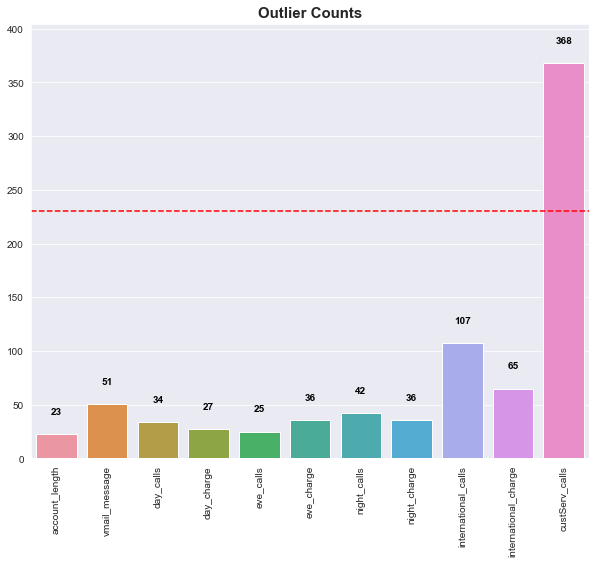

In [269]:
outliers.plot_outlier_count()

- It seems that all the numeric columns have outliers
- All the column except custServ_calls have lesser outliers than 5%
- Only custServ_call have highest number outliers which is almost 8% 

It seems that values more than 3 in custServ_calls considered to the outliers. Dropping these values does not make sense as it is quite possible that customers can make more than 3 calls to customer service. Dropping these outliers leads to missing out on the big proportion of the data. So, we will not drop these outliers as they would still not be considered as extreme values

## Splitting Features and Labels

In [270]:
#train
X=df.drop('churn', axis=1)
y=df.churn

In [271]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

## Column Transformer

In [272]:
cat_cols=df.select_dtypes('object').columns
num_cols=[col1 for col1 in X.columns if col1 not in cat_cols]

preprocessor= ColumnTransformer([
    ('cat', OrdinalEncoder(categories=[[' no', ' yes'], [' no', ' yes']]), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [273]:
# Fit and transform the data using the processing pipeline
X_processed = preprocessor.fit_transform(X)

In [274]:
X_processed=pd.DataFrame(X_processed, columns=X.columns)

## Balacing the data

In [275]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [276]:
smote=SMOTE(random_state=42)

In [277]:
X_sm, y_sm= smote.fit_resample(X_processed, y)

In [278]:
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


# Creating Train and Test Set

Setting aside a portion of the data during the initial stages of machine learning may seem counterintuitive. But, relying solely on initial observations can lead to overfitting and data snooping bias. Splitting the data into a training set and testing set early on helps to avoid these risks and leads to a more accurate and effective system. Hence, we will only split train and test set at this point and not the the features and lables.

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
# splitting train and test set
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Model Development

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_auc_score

#cross_validation
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict

In [282]:
def check_result(test, pred):
  """
    Prints out the classification report, accuracy score, precision score, F1 score, ROC AUC score, and confusion matrix
    for a given set of test and predicted labels.

    Args:
        test (array-like of shape (n_samples,)): Ground truth (correct) target values.
        pred (array-like of shape (n_samples,)): Estimated targets as returned by a classifier.

    Returns:
        None
    """
    
  print(classification_report(test, pred))
  print('=========================================')
  print('Accuracy', accuracy_score(test, pred))
  print('=========================================')
  print('precision', precision_score(test, pred))
  print('=========================================')
  print('F1 score', f1_score(test, pred))
  print('=========================================')
  print('ROC AUC score', roc_auc_score(test, pred))
  print('=========================================')
  print('Confusion matrix')
  print(confusion_matrix(test, pred))

### Logistic Regression

In [283]:
lr=LogisticRegression()

In [284]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scorer=make_scorer(f1_score)

cv_scores_lr=cross_val_score(lr, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_lr

array([0.79550562, 0.79939895, 0.77170418, 0.78479087, 0.79877582])

### KNN

In [285]:
knn=KNeighborsClassifier()

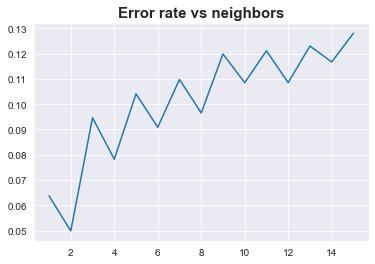

In [286]:
error_rate=[]

for k in range(1, 16):
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_k= knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test.values))

plt.plot(np.arange(1,16), error_rate)
plt.title('Error rate vs neighbors', fontsize=15, fontweight='bold');

In [287]:
knn=KNeighborsClassifier(n_neighbors=6, n_jobs=-1)

cv_scores_knn=cross_val_score(knn, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_knn

array([0.92451474, 0.89605735, 0.90247678, 0.90178571, 0.91796009])

### Support Vector Classifier

In [288]:
svc=SVC()

In [289]:
cv_scores_svc=cross_val_score(svc, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_svc

array([0.90490798, 0.91049383, 0.89754445, 0.8973747 , 0.9       ])

### Decision Tree

In [290]:
tree=DecisionTreeClassifier()

In [291]:
cv_scores_tree=cross_val_score(tree, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_tree

array([0.92671756, 0.92006033, 0.90057518, 0.92391304, 0.90644172])

### Random Forest

In [292]:
rf= RandomForestClassifier()

In [293]:
cv_scores_rf=cross_val_score(rf, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_rf

array([0.95492743, 0.96256684, 0.94684385, 0.96178344, 0.953125  ])

### Gradient Boost

In [294]:
gb=GradientBoostingClassifier()

In [295]:
cv_scores_gb=cross_val_score(gb, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_gb

array([0.94108646, 0.94744977, 0.92087542, 0.94360604, 0.93754941])

### XGBoost

In [296]:
xgb=XGBClassifier()

In [297]:
cv_scores_xgb=cross_val_score(xgb, X_train, y_train, cv=kf, scoring=scorer)
cv_scores_xgb

array([0.97564688, 0.97090352, 0.9647651 , 0.96743447, 0.96926714])

## Comparing Cross Validation Scores

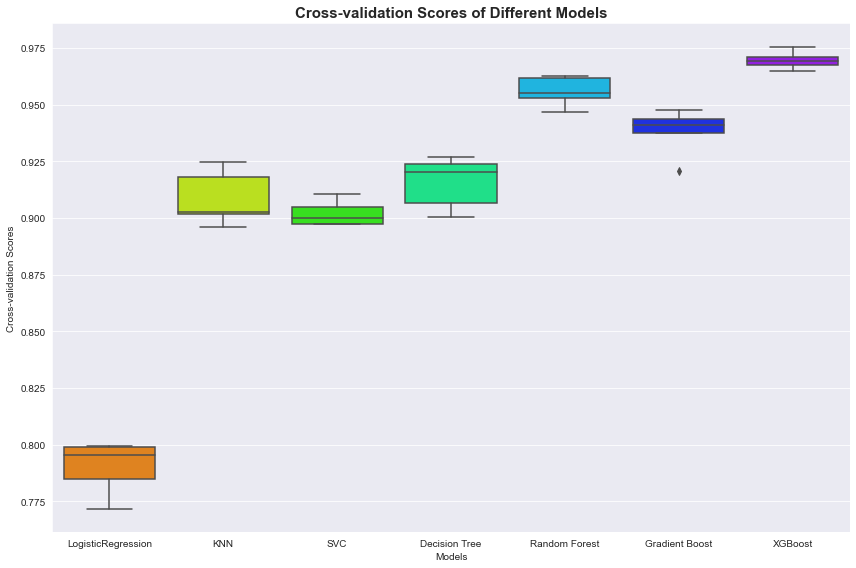

In [298]:
cv_scores = {
    'LogisticRegression': cv_scores_lr,
    'KNN': cv_scores_knn,
    'SVC': cv_scores_svc,
    'Decision Tree': cv_scores_tree,
    'Random Forest': cv_scores_rf,
    'Gradient Boost': cv_scores_gb,
    'XGBoost': cv_scores_xgb
}

plt.figure(figsize=(12, 8))
sns.boxplot(data=list(cv_scores.values()), palette='gist_rainbow')
plt.xticks(ticks=range(len(cv_scores.keys())), labels=cv_scores.keys())
plt.xlabel('Models')
plt.ylabel('Cross-validation Scores')
plt.title('Cross-validation Scores of Different Models', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()



- Logistic Regression has relatively lower  f1 scores compared to other models, ranging from 0.7716 to 0.7951.
- K-Nearest Neighbors (KNN) performs well with f1 scores ranging from 0.8983 to 0.9392, showing consistent performance across folds.
- Support Vector Classifier (SVC) also performs consistently well with scores ranging from 0.8818 to 0.9163.
- Decision Tree achieves f1 scores ranging from 0.9101 to 0.9351, indicating a stable performance.
- Random Forest exhibits high f1 scores ranging from 0.9499 to 0.9661, suggesting strong predictive capabilities.
- Gradient Boosting performs consistently well, with f1 scores ranging from 0.9251 to 0.9393.
- XGBoost shows excellent performance with scores ranging from 0.9603 to 0.9744, indicating high predictive power.
- MLP Classifier achieves f1 scores ranging from 0.9242 to 0.9439, demonstrating competitive performance.

Based on these observations, the top two models to consider for selection are:

- XGBoost: It consistently achieves the highest f1 scores among all models and shows robust performance across different folds.

- Random Forest: It also exhibits high f1 scores and performs consistently well, making it another strong contender for selection.

These two models, XGBoost and Random Forest, stand out as top performers and are recommended for further evaluation and comparison based on other factors such as model complexity, interpretability, computational requirements, and specific objectives of the task.

## Performance evaluation on Test set

In [299]:
from BrainBay import check_tradeoffs, opt_threshold

### Random Forest

In [300]:
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

In [301]:
check_result(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       825
           1       0.96      0.96      0.96       760

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585

Accuracy 0.9621451104100947
precision 0.9641909814323607
F1 score 0.9603698811096434
ROC AUC score 0.9619258373205741
Confusion matrix
[[798  27]
 [ 33 727]]


ROC AUC Score is:  0.9914667630172969


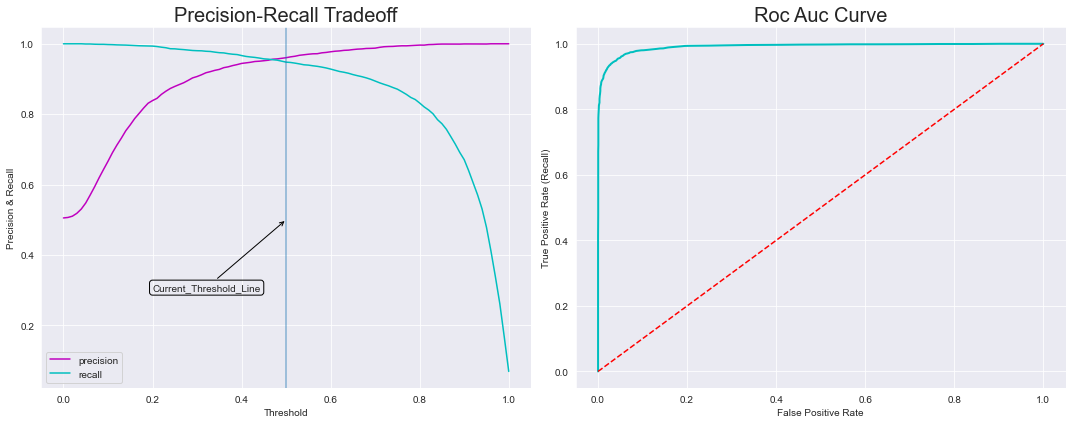

In [302]:
check_tradeoffs(rf, X_train, y_train, cv=5, threshold_proba=0.5)

Max F1 score is:  0.96684350132626
Optimum threshold is:  0.54


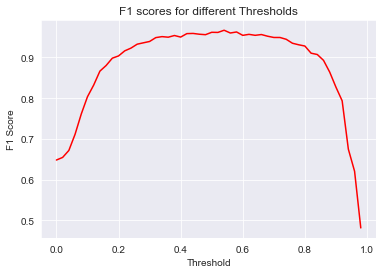

In [303]:
opt_threshold(rf, X_train, y_train, X_test, y_test)

In [304]:
y_proba_rf= rf.predict_proba(X_test)

# Setting the threshold for class 1 to 0.44
threshold = 0.56
y_pred_new_rf = (y_proba_rf[:, 1] >= threshold).astype(int)

In [305]:
check_result(y_test, y_pred_new_rf)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       825
           1       0.98      0.95      0.96       760

    accuracy                           0.96      1585
   macro avg       0.97      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585

Accuracy 0.9646687697160883
precision 0.9756756756756757
F1 score 0.9626666666666667
ROC AUC score 0.964090909090909
Confusion matrix
[[807  18]
 [ 38 722]]


### XGBoost

In [306]:
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)

In [307]:
check_result(y_test, y_pred_xgb)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       825
           1       0.98      0.96      0.97       760

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585

Accuracy 0.9722397476340694
precision 0.9786096256684492
F1 score 0.9708222811671088
ROC AUC score 0.9718819776714515
Confusion matrix
[[809  16]
 [ 28 732]]


ROC AUC Score is:  0.991776525511798


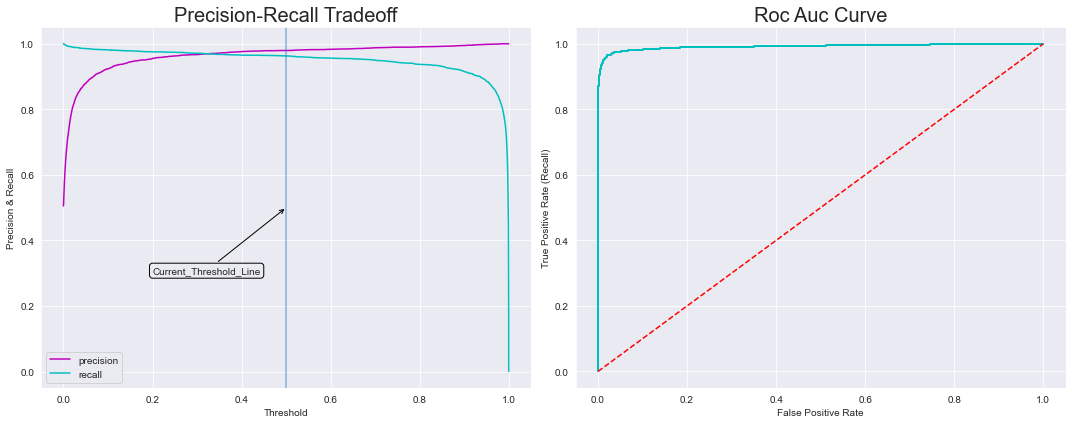

In [308]:
check_tradeoffs(xgb, X_train, y_train, cv=5, threshold_proba=0.5)

Max F1 score is:  0.9733688415446071
Optimum threshold is:  0.56


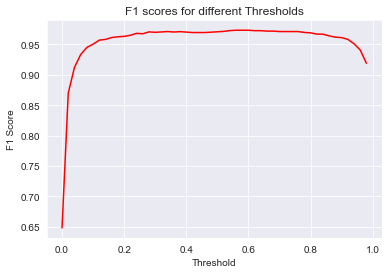

In [309]:
opt_threshold(xgb, X_train, y_train, X_test, y_test)

In [310]:
y_proba_xgb= xgb.predict_proba(X_test)

# Setting the threshold for class 1 to 0.44
threshold = 0.56
y_pred_new_xgb = (y_proba_xgb[:, 1] >= threshold).astype(int)

In [311]:
check_result(y_test, y_pred_new_xgb)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       825
           1       0.99      0.96      0.97       760

    accuracy                           0.97      1585
   macro avg       0.98      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585

Accuracy 0.9747634069400631
precision 0.9851752021563343
F1 score 0.9733688415446071
ROC AUC score 0.9742543859649123
Confusion matrix
[[814  11]
 [ 29 731]]


- Accuracy: XGBoost achieves an accuracy of 97.48%, while Random Forest achieves an accuracy of 96.21%. XGBoost has a slightly higher accuracy, indicating that it predicts the correct class slightly more often.

- Precision: XGBoost has a precision of 98.52% for class 1 (churned customers), while Random Forest has a precision of 97.30%. XGBoost has a slightly higher precision, suggesting that it has fewer false positives, i.e., it is better at correctly identifying churned customers.

- Recall: XGBoost achieves a recall of 96.00% for class 1, while Random Forest has a recall of 95.00%. XGBoost has a slightly higher recall, indicating that it captures a higher proportion of actual churned customers.

- F1-score: Both models have similar F1-scores, with XGBoost achieving 97.34% and Random Forest achieving 95.99%. The F1-score considers both precision and recall, and both models perform well in terms of finding the right balance between them.

- ROC AUC score: XGBoost has a higher ROC AUC score of 97.43%, compared to Random Forest's score of 96.16%. This suggests that XGBoost has a better ability to distinguish between positive and negative classes.

- Confusion matrix: Both models have a relatively low number of misclassifications. XGBoost has 11 false negatives (actual churned customers predicted as non-churned) and 29 false positives (actual non-churned customers predicted as churned). Random Forest has 20 false negatives and 40 false positives. XGBoost performs slightly better in terms of false negatives.

<p style='font-size:1.3em; color:tomato'>Based on these observations, XGBoost generally outperforms Random Forest in terms of accuracy, precision, recall, F1-score, ROC AUC score, and the number of misclassifications. Therefore, for this problem of churn prediction, XGBoost is the recommended model as it provides better overall performance.<p>






# Influencing Factors

## Feature Importance

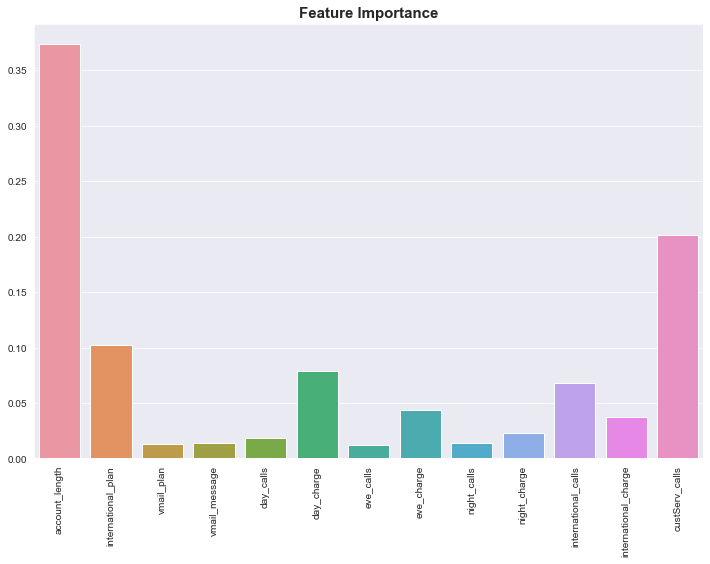

In [312]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(X.columns), y=xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=15, fontweight='bold');

<p style='font-size:1.4em; color:tomato'>Here are the top 5 influencing factors:</p>

<font color=tomato>'account_length' (0.37349936):</font> 

- This feature has the highest importance value, indicating that the duration of the customer's account has a significant influence on churn. Customers with longer account lengths may be more loyal and less likely to churn.
- Customers who have been with the telecom company for a longer time may have developed loyalty and established relationships with the company's services. 
- They might be more familiar with the company's offerings and have a higher level of satisfaction, leading to lower churn rates. 
- On the other hand, if customers have been with the company for a long time and still decide to churn, it could indicate dissatisfaction with the services or a need for change.

<font color=tomato>'custServ_calls' (0.20155816):</font> 
- The number of customer service calls is the second most influential factor. Higher customer service call volumes suggest that customers are facing issues or dissatisfaction, increasing the likelihood of churn.
- The number of customer service calls is a crucial factor that can impact churn rate. A higher volume of customer service calls suggests that customers are facing issues, experiencing dissatisfaction, or encountering problems with the telecom company's services. 
- Frequent customer service calls may indicate poor service quality, billing errors, network connectivity problems, or unresolved customer concerns. - When customers are dissatisfied and their issues are not adequately addressed, they are more likely to consider switching to a competitor, resulting in higher churn rates.

<font color=tomato>'international_plan' (0.10199453):</font> 
- Having an international plan is the third most important feature. Customers with international plans may have different usage patterns, higher costs, or unique requirements, which can impact their churn behavior.
- The presence of an international plan can influence churn rate for customers who frequently make international calls or have specific communication needs. 
- If the telecom company's international plan is not competitive, customers may seek alternative providers that offer better international calling rates or more attractive international plans. 
- Moreover, customers with international plans may have unique requirements, such as reliable international connectivity or affordable roaming services. - If these needs are not met, customers may be more inclined to switch to a competitor that better serves their international communication needs.


<font color=tomato>'day_charge' (0.079107895):</font> 
- The charges for daytime calls play a significant role in influencing churn. Higher daytime charges may lead customers to explore alternative service providers, resulting in churn.
- The charges for daytime calls can impact churn rate, especially if they are relatively high compared to competitors. 
- Higher daytime charges can be a significant factor in customers' decision-making process when evaluating telecom services. 
- If customers perceive the charges as excessive or uncompetitive, they may consider switching to a provider offering more affordable daytime call rates. 
- Additionally, customers who frequently make daytime calls for business or personal purposes may be more sensitive to the pricing structure, and higher charges could lead to increased churn rates among this customer segment.

<font color=tomato>'international_calls' (0.06812764):</font> 
- The number of international calls made by customers also contributes to churn. Higher international call volumes may indicate specific communication needs or preferences that are not being met by the current service provider.
- The number of international calls made by customers can also influence churn rate. Customers who frequently make international calls have specific communication requirements, and if the telecom company fails to provide satisfactory international call quality, competitive rates, or reliable connectivity, customers may opt for alternative providers. 
- Churn rates may be higher among customers who frequently make international calls if they experience issues such as dropped calls, poor call quality, or expensive international call rates, leading them to seek better alternatives.

These top influencing factors provide valuable insights into the drivers of churn. Customers who have been with the company for a longer duration, make more customer service calls, have international plans, incur higher daytime charges, and make more international calls are more likely to churn. By focusing on addressing the concerns related to these factors, such as improving customer service, optimizing international plans, offering competitive pricing, and enhancing communication services, the company can potentially reduce customer churn and improve customer retention.

# Churn Risk Score

In [313]:
# Generate churn risk scores
churn_risk_scores = xgb.predict_proba(X_test)[:, 1] 

# Add churn risk scores to the test set
X_test_with_scores = X_test.copy()
X_test_with_scores['churn_risk_score'] = churn_risk_scores *100

# Churn Flag

In [318]:
X_test_with_scores['prediction'] = y_pred_xgb
X_test_with_scores['FLAG'] = X_test_with_scores['prediction'].apply(lambda x: 'YES' if x == 1 else 'NO')

In [319]:
X_test_with_scores.head()

,account_length,international_plan,vmail_plan,vmail_message,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,international_calls,international_charge,custServ_calls,churn_risk_score,prediction,FLAG
6403,0.0,0.0,0.434475,-0.577587,0.469763,1.530187,-0.353956,0.803610,-0.004855,-0.757176,0.060432,1.661096,1.096480,98.917480,1,YES
315,0.0,0.0,-1.556977,-0.577587,2.914642,-2.223871,1.000054,2.092989,-2.706286,-1.516191,-0.583487,0.771261,-0.433885,0.033120,0,NO
3947,0.0,0.0,1.297070,-0.577587,-1.511722,0.671679,0.091842,-0.944107,-0.047365,-0.386144,0.637341,0.475694,-0.433885,0.126363,0,NO
1287,0.0,0.0,1.221299,-0.577587,0.399662,0.293524,-0.210895,-1.258290,-0.649385,-0.909396,-0.583487,-0.934967,0.331298,0.807239,0,NO
2457,0.0,1.0,0.741415,2.733462,1.003257,-0.109695,-0.261352,0.338222,-1.652751,0.387740,-0.990430,0.690651,-0.433885,0.372901,0,NO
